## For the case of constant wall temperature

M1 = 0.2000, 4fx/D = 8.0000, Tw1/T01 = 3.0000


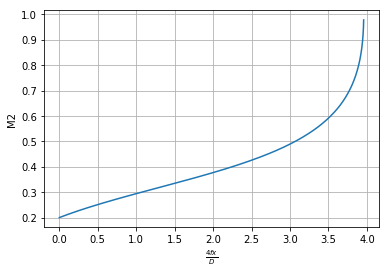

M2 =  0.9780335255310673
T02 =  272.34730732841444


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Tw1 = 300
ff = 0.005
D = 0.1
T01 = 100
M1 = 0.2
L = 40
Gamma = 1.4
numSteps = 10000
tspan = np.linspace(0,L,numSteps)
#print(tspan)
print("M1 = {:.4f}, 4fx/D = {:.4f}, Tw1/T01 = {:.4f}".format(M1,4*ff*L/D, Tw1/T01))

def FuncT0(Msq, Gamma):
    #Msq = M ** 2.0
    FuncT0 = Msq*(1.0+Gamma*Msq)*(1.0+(Gamma-1.0)/2.0*Msq)/(1.0-Msq)
    return FuncT0

def FuncFf(Msq, Gamma):
    #Msq = M ** 2.0
    FuncFf = Gamma*Msq**2*(1.0+(Gamma-1.0)/2.0*Msq)/(1.0-Msq)
    return FuncFf

def dT0_dx(T0):
    _dT0_dx = 2 * ff / D * (Tw1 - T0)
    return _dT0_dx

def dM2_dx(Msq, T0):
    _dM2_dx = FuncT0(Msq, Gamma) * dT0_dx(T0) / T0 + FuncFf(Msq, Gamma) * 4.0 * ff / D
    return _dM2_dx
    
def f(t,y):
    dydt = [dM2_dx(y[0], y[1]), dT0_dx(y[1])]
    return dydt

def solve():
    yinit = [M1 **2, T01]
    #print(yinit)
    soln = solve_ivp(lambda t, y: f(t, y), [tspan[0], tspan[-1]], yinit, method = 'Radau', t_eval=tspan, jac = None)
    #print(soln.y[0])
    return soln
    
solution = solve()
plt.plot(4* ff *solution.t/D,np.sqrt(solution.y[0]))
plt.ylabel('M2')
plt.xlabel('$\\frac{4fx}{D}$')
plt.grid()
plt.show()
print("M2 = ",np.sqrt(solution.y[0][-1]))
print("T02 = ", solution.y[1][-1])

## For the case of constant heat flux

M1 = 0.1000, 4fx/D = 56.0000, Tw1/T01 = 3.0000


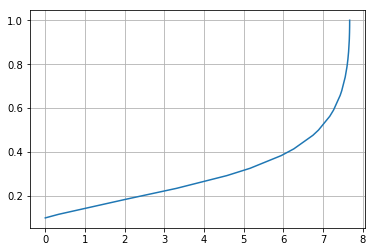

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Tw1 = 300
ff = 0.005
D = 1
T01 = 100
M1 = 0.1
L = 2800
Tw_T0 = Tw1 - T01
Gamma = 1.4
numSteps = 100001
tspan = np.linspace(0,L,numSteps)
#print(tspan)
print("M1 = {:.4f}, 4fx/D = {:.4f}, Tw1/T01 = {:.4f}".format(M1,4*ff*L/D, Tw1/T01))

def FuncT0(Msq, Gamma):
    #Msq = M ** 2.0
    FuncT0 = Msq*(1.0+Gamma*Msq)*(1.0+(Gamma-1.0)/2.0*Msq)/(1.0-Msq)
    return FuncT0

def FuncFf(Msq, Gamma):
    #Msq = M ** 2.0
    FuncFf = Gamma*Msq**2*(1.0+(Gamma-1.0)/2.0*Msq)/(1.0-Msq)
    return FuncFf

def dT0_dx(T0):
    _dT0_dx = 2 * ff / D * Tw_T0 #(Tw1 - T0)
    return _dT0_dx

def dM2_dx(Msq, T0):
    _dM2_dx = FuncT0(Msq, Gamma) * dT0_dx(T0) / T0 + FuncFf(Msq, Gamma) * 4.0 * ff / D
    return _dM2_dx
    
def f(t,y):
    dydt = [dM2_dx(y[0], y[1]), dT0_dx(y[1])]
    return dydt

def solve():
    yinit = [M1 **2, T01]
    #print(yinit)
    soln = solve_ivp(lambda t, y: f(t, y), [tspan[0], tspan[-1]], yinit, method = 'Radau', jac = None)
    #print(soln.y[0])
    return soln
    
solution = solve()
plt.plot(4* ff *solution.t/D,np.sqrt(solution.y[0]))
plt.grid()
plt.show()

In [13]:
len(solution.t)

46